# TP 1 - Séance I
## Qualité d'image

In [127]:
# Importe les modules qui seront utilisé dans le laboratoire.
import numpy as np
from IPython.display import clear_output
import matplotlib.pyplot as plt
from matplotlib.pyplot import imread
from matplotlib.pyplot import imshow
%matplotlib inline
# Étend la taille des figures
plt.rcParams["figure.figsize"] = (12, 7)


# Exercice I (7 points): Étude de la résolution
## Mesure de la résolution spatiale

**1.** Ouvrez et affichez l'image ```resolution.png```.

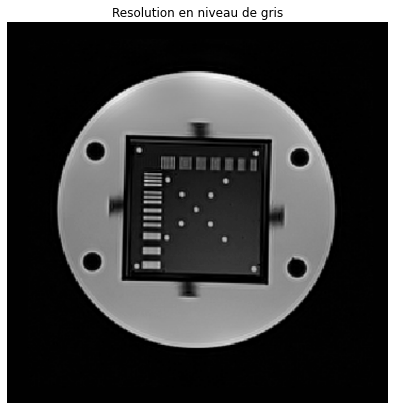

In [128]:
img = imread('resolution.png')

imshow(img, cmap='gray')
plt.axis('off') # Désactive les axes gradués
plt.title("Resolution en niveau de gris")
plt.show()


**2.** La largeur du cube central est de 10 cm. En déduire la largeur d'un pixel en millimètre.

La largeur d'un pixel est : 0.5102040816326531 mm


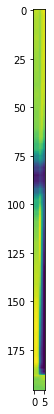

In [129]:
# Les coordonnées des coins supérieurs du carré sont: (160,151) et (356, 157).

cote_cube = img[160:356, 151:157]
imshow(cote_cube)

# Sur les lignes: 
npixels_ligne = 356-160 
largeur_pixel = 100/npixels_ligne 
print("La largeur d'un pixel est :", largeur_pixel, "mm")


**3.** Définissez la méthode ```downsample(img, f)```:

In [130]:
def downsample(img, f):
    """ Sous-échantillone l'image img d'un facteur f
    @param img  L'image à sous-échantilloner.
    @param f    Le facteur de sous-échantillonage (un pixel sur f est conservé).
    @return     L'image sous-échantillonée: sa taille est celle d'img divisée par f.
    """
    height = 512
    width = 512
    
    h = int(height/f)
    w = int(width/f)
    
    img_copy = np.zeros((h, w))
      
    for i in range(h):        
        for j in range(w):
            img_copy[i,j] = img[i*f,j*f]
            
    return img_copy




**4.** Affichez les images sous-échantillonnées avec ```f=2,5,8```. Comment évolue la largeur d'un pixel lors du sous-échantillonage?

La largeur d'un pixel pour f = 2 : 1.0204081632653061
La largeur d'un pixel pour f = 5 : 2.5610244097639057
La largeur d'un pixel pour f = 8 : 4.081632653061225


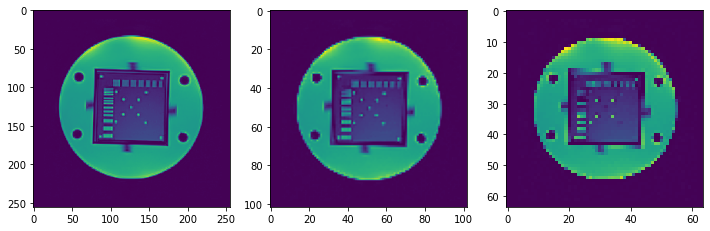

In [131]:
largeur_image = 512*largeur_pixel 

fig, (ax1, ax2, ax3) = plt.subplots(1,3)
img_copy_2 = downsample(img, 2)
ax1.imshow(img_copy_2)
[height_2, width_2] = img_copy_2.shape
largeur_pixel_2 = largeur_image/height_2
print("La largeur d'un pixel pour f = 2 :", largeur_pixel_2)

img_copy_5 = downsample(img, 5)
ax2.imshow(img_copy_5)
[height_5, width_5] = img_copy_5.shape
largeur_pixel_5 = largeur_image/height_5
print("La largeur d'un pixel pour f = 5 :", largeur_pixel_5)

img_copy_8 = downsample(img, 8)
ax3.imshow(img_copy_8)
[height_8, width_8] = img_copy_8.shape
largeur_pixel_8 = largeur_image/height_8
print("La largeur d'un pixel pour f = 8 :", largeur_pixel_8)




**5.** Affichez les profils d'intensités le long d'axes perpendiculaires aux mires. Quelle est l'épaisseur de la plus petite mire observable?

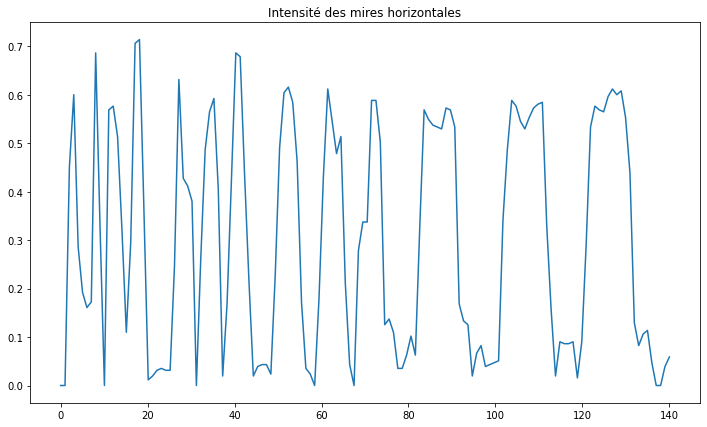

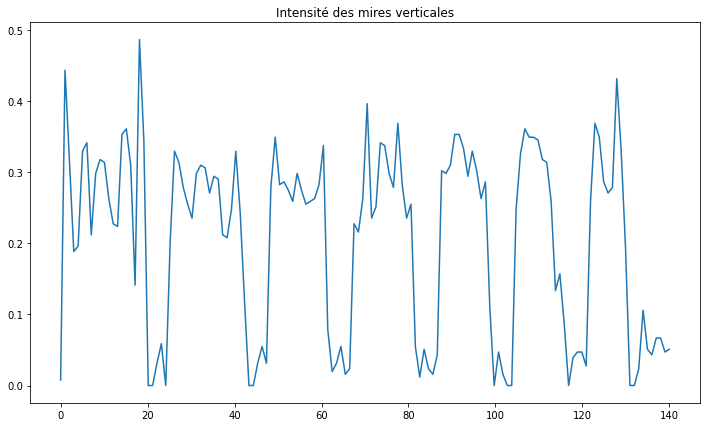

0.125


In [132]:
# Pour les deux profils vous pouvez prendre: y=201:341, x=200 et y=190, x=206:346.


# Afficher intensites
mires_horizontales = img[201:341, 200]
mires_verticales = img[190, 206:346]

unit = np.linspace(0, 140, 140)

plt.figure()
plt.plot(unit, mires_horizontales)
plt.title('Intensité des mires horizontales')

plt.figure()
plt.plot(unit, mires_verticales)
plt.title('Intensité des mires verticales')

plt.show()

# ÉPAISSEUR DE LA PLUS PETITE MIRE OBSERVABLE :
# On distingue toutes les mires horizontales. La plus petite est de 1/8 mm
print(1/8)
# La plus petite mire verticales qu'on peut distinguer est celle de 1mm.


**6.** Discutez de la relation entre la résolution de l'image (largeur d'un pixel) et la taille du plus petit objet observable. Sachant la résolution, quelle est la taille minimale observable? Est-elle garantie?

La taille du plus petit objet observable correspond à la largeur d'un pixel. Cependant, il n'est pas garantie de pouvoir voir un objet aussi petit car l'image comporte du bruit et le contraste peut ne pas être bon. Dans ces conditions, il ne sera pas possible de distingue clairement l'objet.

## Mesure de l'épaisseur de coupe

**7.** Affichez les profils d'intensités des 4 rampes et mesurer graphiquement la largeur des gaussiennes à mi-hauteur 

*Indice*: Vous pouvez normaliser le signal sur une gamme d’intensité plus facile à manipuler. Vous pouvez ensuite tracer une ligne horizontale pour vous aider à mesurer la largeur à mi-hauteur. Affichez les grilles sur les graphiques, puis augmentez la fréquence des ticks et la taille de l'image pour faciliter la mesure.

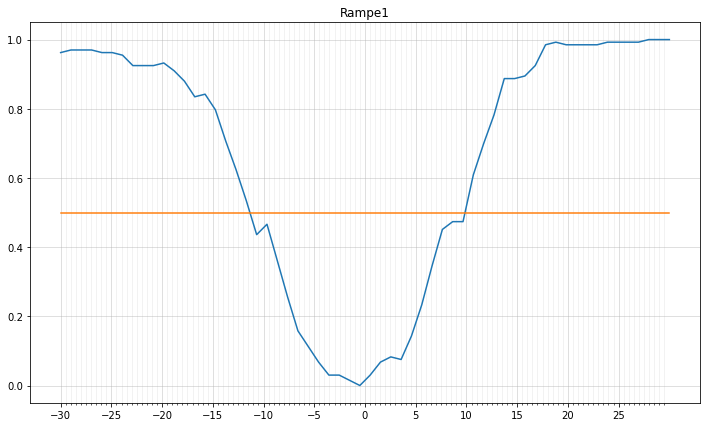

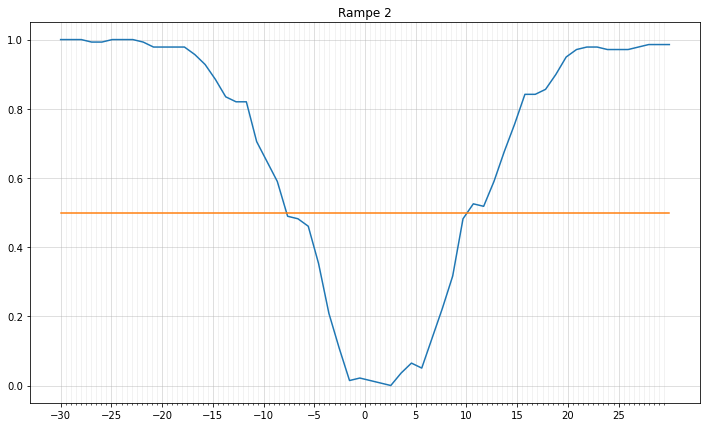

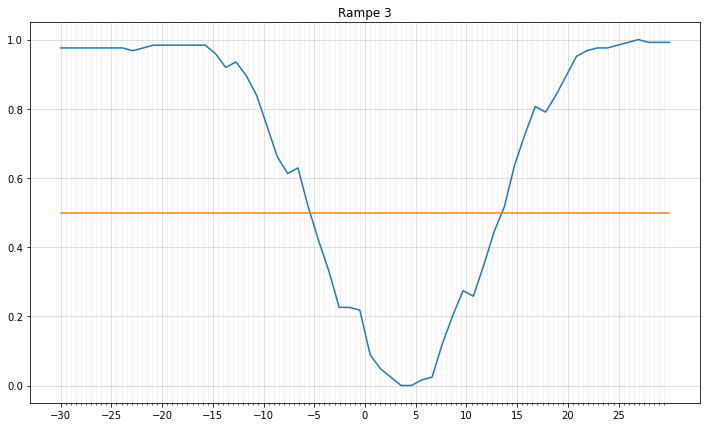

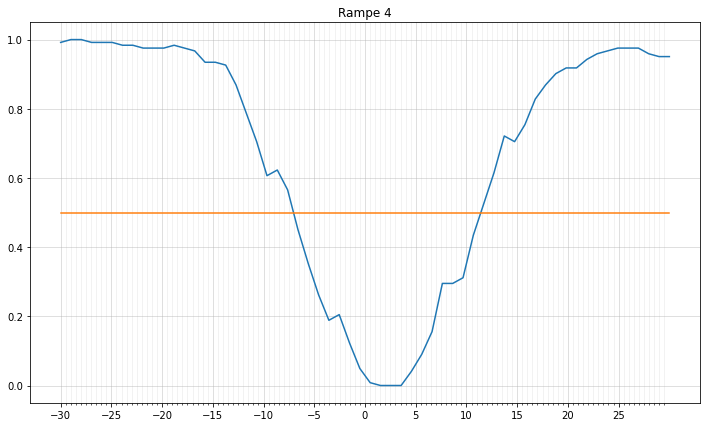

Graphiquement, LMH1 = 10 + 11,5 = 21,5 pixels. Ce qui équivaut à  10.96938775510204
Graphiquement, LMH2 = 10 + 8 = 18 pixels. Ce qui équivaut à  9.183673469387756
Graphiquement, LMH3 = 13,5 + 5,5 = 19 pixels. Ce qui équivaut à  9.693877551020408
Graphiquement, LMH4 = 11 + 7 = 21,5 pixels. Ce qui équivaut à  9.183673469387756


In [133]:

largeur = np.linspace(-30, 30, 60)  

# Ligne horizontale à la mi-hauteur 
# y = 0,5 après normalisation de l'intensité 
x = [-30, 30]
y = [0.5, 0.5]


# RAMPE 1 
# y=140; x=230:290
fig, ax = plt.subplots()
rampe1 = img[140, 230:290]
max_rampe1 = np.amax(rampe1)
min_rampe1 = np.amin(rampe1)
rampe1 = (rampe1-min_rampe1)/(max_rampe1-min_rampe1) 

ax.plot(largeur, rampe1)
ax.plot(x, y)
ax.set_title('Rampe1')

# Major ticks every 10, minor ticks every 1
major_ticks = np.arange(-30, 30, 5)
minor_ticks = np.arange(-30, 30, 0.5)

ax.set_xticks(major_ticks)
ax.set_xticks(minor_ticks, minor=True)

ax.grid(which='both')

ax.grid(which='minor', alpha=0.2)
ax.grid(which='major', alpha=0.5)

plt.show()


# RAMPE 2
# y=230:290; x=365
fig, ax = plt.subplots()
rampe2 = img[230:290, 365]
rampe2 = np.transpose(rampe2)
max_rampe2 = np.amax(rampe2)
min_rampe2 = np.amin(rampe2)
rampe2 = (rampe2-min_rampe2)/(max_rampe2-min_rampe2) 

ax.plot(largeur, rampe2)
ax.plot(x, y)
ax.set_title('Rampe 2')

ax.set_xticks(major_ticks)
ax.set_xticks(minor_ticks, minor=True)

ax.grid(which='both')

ax.grid(which='minor', alpha=0.2)
ax.grid(which='major', alpha=0.5)

plt.show()


# RAMPE 3
# y=360; x=210:270
fig, ax = plt.subplots()
rampe3 = img[360, 210:270]
max_rampe3 = np.amax(rampe3)
min_rampe3 = np.amin(rampe3)
rampe3 = (rampe3-min_rampe3)/(max_rampe3-min_rampe3) 

ax.plot(largeur, rampe3)
ax.plot(x, y)
ax.set_title('Rampe 3')

ax.set_xticks(major_ticks)
ax.set_xticks(minor_ticks, minor=True)

ax.grid(which='both')

ax.grid(which='minor', alpha=0.2)
ax.grid(which='major', alpha=0.5)

plt.show()


# RAMPE 4
# y=215:275; x=147
fig, ax = plt.subplots()
rampe4 = img[215:275, 147]
rampe4 = np.transpose(rampe4)
max_rampe4 = np.amax(rampe4)
min_rampe4 = np.amin(rampe4)
rampe4 = (rampe4-min_rampe4)/(max_rampe4-min_rampe4) 

ax.plot(largeur, rampe4)
ax.plot(x, y)
ax.set_title('Rampe 4')

ax.set_xticks(major_ticks)
ax.set_xticks(minor_ticks, minor=True)

ax.grid(which='both')

ax.grid(which='minor', alpha=0.2)
ax.grid(which='major', alpha=0.5)

plt.show()

LMH1_mm = 21.5*largeur_pixel
LMH2_mm = 18*largeur_pixel
LMH3_mm = 19*largeur_pixel
LMH4_mm = 18*largeur_pixel


print("Graphiquement, LMH1 = 10 + 11,5 = 21,5 pixels. Ce qui équivaut à ", LMH1_mm)
print("Graphiquement, LMH2 = 10 + 8 = 18 pixels. Ce qui équivaut à ", LMH2_mm)
print("Graphiquement, LMH3 = 13,5 + 5,5 = 19 pixels. Ce qui équivaut à ", LMH3_mm)
print("Graphiquement, LMH4 = 11 + 7 = 21,5 pixels. Ce qui équivaut à ", LMH4_mm)


**8.** L'épaisseur de la coupe est donnée par $e=\tan(14^\circ) \times FWHM$ où $FWHM$ est la largeur à mi-hauteur en mm.
Sachant que les paramètres de l'IRM indiquent une épaisseur de coupe théorique de $2\pm0.2$ mm, passerait-il le controle qualité?

In [134]:
e1 = np.tan(np.radians(14))*LMH1_mm
e2 = np.tan(np.radians(14))*LMH2_mm
e3 = np.tan(np.radians(14))*LMH3_mm
e4 = np.tan(np.radians(14))*LMH4_mm

print("Épaisseur des coupes 1, 2 ,3 et 4, respectivement (mm) : ", e1, e2, e3, e4)

print("L'épaisseur de toutes ces coupes ne respecte pas la tolérance de 2 +/- 0,2mm et donc ne passerait pas le controle qualité.")

Épaisseur des coupes 1, 2 ,3 et 4, respectivement (mm) :  2.734975541392033 2.2897469648863535 2.416955129602262 2.2897469648863535
L'épaisseur de toutes ces coupes ne respecte pas la tolérance de 2 +/- 0,2mm et donc ne passerait pas le controle qualité.


# Exercice II (6 points): Analyse du contraste et du bruit
## Mesure du contraste

**1.** Chargez  et affichez l'image ```contraste.png```.

(512, 512)


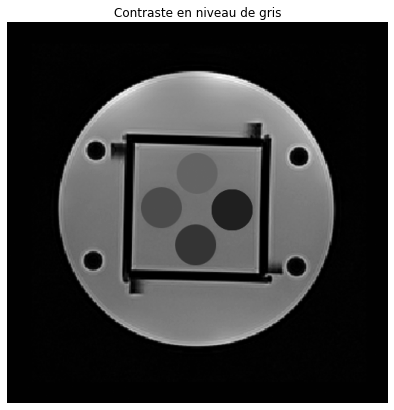

In [135]:
imgContraste = imread('contraste.png')

imshow(imgContraste, cmap='gray')
plt.axis('off') # Désactive les axes gradués
plt.title("Contraste en niveau de gris")

print(imgContraste.shape)

**2.** Chargez  et affichez les 4 matrices ```vial1.npy```, ```vial2.npy```, ```vial3.npy```, ```vial4.npy```.

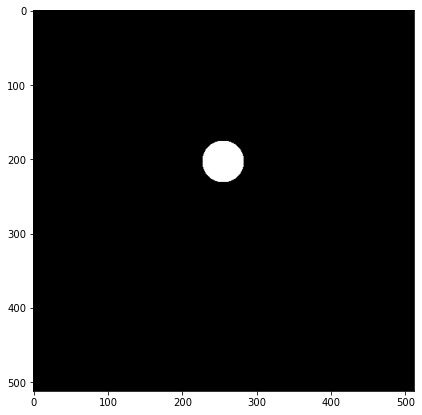

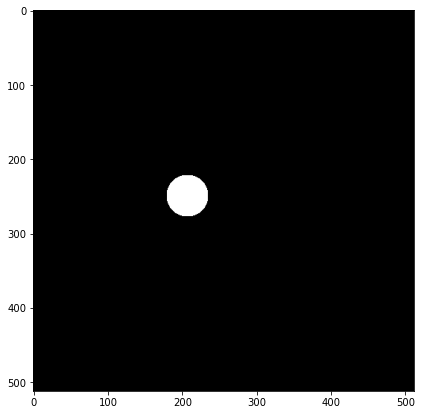

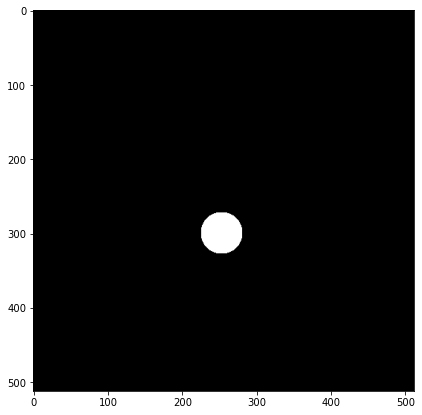

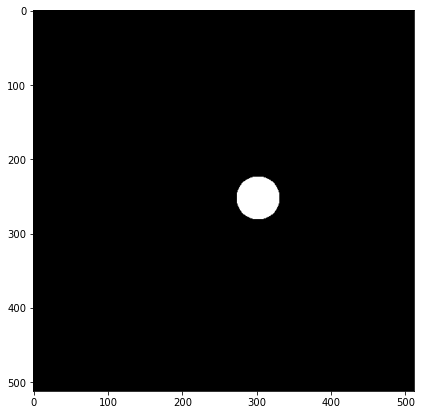

In [157]:
# Utilisez np.load('fichier.npy') pour charger une matrice numpy.
vial1 = np.load('vial1.npy')
plt.figure()
plt.imshow(vial1,cmap="gray")

vial2 = np.load('vial2.npy')
plt.figure()
plt.imshow(vial2,cmap="gray")

vial3 = np.load('vial3.npy')
plt.figure()
plt.imshow(vial3,cmap="gray")

vial4 = np.load('vial4.npy')
plt.figure()
plt.imshow(vial4,cmap="gray")


**3.** Définissez et affichez le masque du fond du fantôme qui est constitué du carré central privé des 4 ampoules.
Pour le carré central vous pourrez prendre la région: 

$174\leq y<330$ et $178\leq x<331$

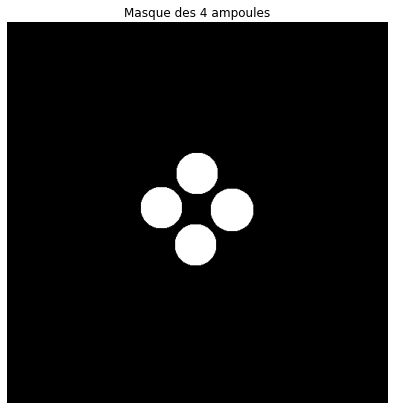

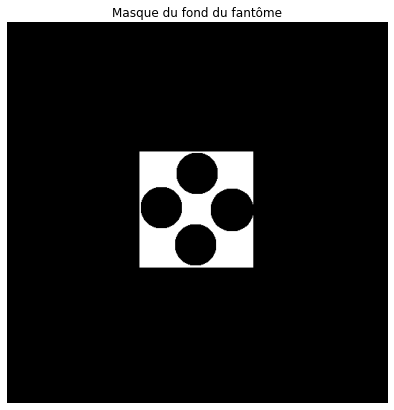

float32


In [144]:
# Définir masque pour le carré central
masque_carre = np.zeros_like(imgContraste)
masque_carre[174:330, 178:331] = 1

# Définir masque pour les 4 ampoules (vials)
masque_vials = np.zeros_like(imgContraste)

masque_vials = vial1 + vial2 + vial3 + vial4 

plt.figure()
plt.imshow(masque_vials, cmap = 'gray')
plt.title("Masque des 4 ampoules")
plt.axis('off') 

# Définir le masque pour le fond 
masque_fond = masque_carre - masque_vials
plt.figure()
plt.imshow(masque_fond, cmap = 'gray')
plt.title('Masque du fond du fantôme')
plt.axis('off') 
plt.show()



**4.** Calculez l'intensité moyenne sur ces 4 régions et sur le fond du fantôme. En déduire le contraste entre chaque ampoule et le fond du fantôme.

In [162]:
# Pour extraire la valeur des pixels d'une image appartenant à un masque on utilise la syntaxe:
# image[masque]  (où image et masque on la même taille et où masque est une matrice booléenne)


# Transformer le masque défini plus haut en matrice booléenne
masque_fond_bool = masque_fond >= 1
fond_contraste = imgContraste[masque_fond_bool]
f_fond_contraste = np.mean(fond_contraste)
ampoule1 = imgContraste[vial1]
f_ampoule1 = np.mean(ampoule1)

ampoule2 = imgContraste[vial2]
f_ampoule2 = np.mean(ampoule2)

ampoule3 = imgContraste[vial3]
f_ampoule3 = np.mean(ampoule3)

ampoule4 = imgContraste[vial4]
f_ampoule4 = np.mean(ampoule4)


# Trouver les contrastes locaux ((Icible - Ifond) / Ifond)
contraste1 = (f_ampoule1 - f_fond_contraste)/ f_fond_contraste
contraste2 = (f_ampoule2 - f_fond_contraste)/ f_fond_contraste
contraste3 = (f_ampoule3 - f_fond_contraste)/ f_fond_contraste
contraste4 = (f_ampoule4 - f_fond_contraste)/ f_fond_contraste

print("Les contrastes locaux entre les ampoules et le fond du fantôme sont respectivement de :")
print(contraste1)
print(contraste2)
print(contraste3)
print(contraste4)



Les contrastes locaux entre les ampoules et le fond du fantôme sont respectivement de :
-0.13934109
-0.3422397
-0.5306777
-0.67711526


## Mesure du rapport signal/bruit

**5.** Chargez et affichez l'image ```bruit.png```. (Conservez les axes et afficher une grille).

(512, 512)


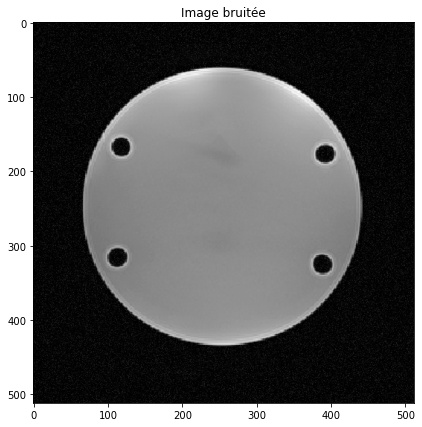

In [139]:
imgBruit = imread('bruit.png')

imshow(imgBruit, cmap='gray')
plt.axis('on') # Désactive les axes gradués
plt.title("Image bruitée")
#plt.show()

print(imgBruit.shape)

**6.** En vous aidant de l'image affichée à la question précédente, sélectionner grossièrement la région d'intéret et les 4 zones de fond. 

Puis calculez le rapport signal bruit en décibel.

In [140]:
#    SNR differentiel

masque_cible = np.zeros_like(imgBruit, dtype = 'bool')
masque_cible[170:330, 170:330] = True

aire = (330-170)*(330-170)

print("L'aire est de ", aire, "pixels")

# L'aire du fond doit être égale à l'aire de la cible (25600 pixels).
# Puisque l'aire du fond est consitutée de 4 carrés, chaque carré doit avec une aire de 25600/4 = 6400 pixels.
# Chaque carré du fond doit donc avoir un côté de 80 pixels.

cible = imgBruit[masque_cible]
f_cible = np.mean(cible) 

masque_fond1 = np.zeros_like(imgBruit, dtype = 'bool')
masque_fond1[20:100, 20:100] = True
fond1 = imgBruit[masque_fond1]
f_fond1 = np.mean(fond1)

masque_fond2 = np.zeros_like(imgBruit, dtype = 'bool')
masque_fond2[20:100, 420:500] = True
fond2 = imgBruit[masque_fond2]
f_fond2 = np.mean(fond2)

masque_fond3 = np.zeros_like(imgBruit, dtype = 'bool')
masque_fond3[420:500, 20:100] = True
fond3 = imgBruit[masque_fond3]
f_fond3 = np.mean(fond3)

masque_fond4 = np.zeros_like(imgBruit, dtype = 'bool')
masque_fond4[420:500, 420:500] = True
fond4 = imgBruit[masque_fond4]
f_fond4 = np.mean(fond4)


fond = np.append([fond1], [[fond2], [fond3], [fond4]])

f_fond = np.mean(fond)
print("La moyenne du signa; du fond est de ", f_fond)

ecart_type_fond = np.std(fond)
print("L'étart-type est de ", ecart_type_fond)


snr_diff = aire*(f_cible - f_fond)/ecart_type_fond
print("Le SNR différentiel est de ", snr_diff)

snr_dB = 10 * np.log10(snr_diff)
print("Le SNR différentiel en dB est de ", snr_dB, "dB")


L'aire est de  25600 pixels
La moyenne du signa; du fond est de  0.024044883
L'étart-type est de  0.029777354
Le SNR différentiel est de  412895.04863293277
Le SNR différentiel en dB est de  56.15839674920504 dB


**7.** Que représente le rapport signal/bruit? Est-il préférable d'avoir un SNR faible ou fort?

Il représente...

Il est préférable d'Avoir un SNR fort car cella signifie que l'amplitude du signal est >> que l'amplitude du bruit.

# Exercice III (bonus, 1.5 points)
## Comparaison d'imageries intra-vasculaires

**1.** Chargez et affichez les deux images ```echo.png``` et ```oct.png```. Convertissez l'image OCT en niveau de gris en sélectionnant son canal rouge.


Affichez les portions des images concernées par les masques ```echo_lum.npy```, ```echo_paroi.npy```, ```oct_lum.npy``` et ```oct_paroi.npy``` (en multipliant l'image par son masque).

In [141]:

echolum = img*masque
plt.figure()
plt.imshow(echolum)

NameError: name 'masque' is not defined

**2.** Calculez le contraste entre la paroi et la lumière du vaisseau ainsi que le SNR des deux modalités.

In [ ]:
# Si les aires de région d'intéret et de fond sont différentes, on prend l'aire du fond dans la formule du SNR.

**3.** Discutez du choix entre l'OCT et de l'echocardiographie pour une simple mesure du diamètre de la lumière du vaisseau.
